<a href="https://colab.research.google.com/github/zhentinela-ai/red-nueronal-desde-cero/blob/main/Red_Neuronal_desde_cero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb -qU

In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import torch

import wandb

from sklearn.datasets import make_circles

In [3]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
wandb.login()

wandb: Currently logged in as: zhent (zhent-ai). Use `wandb login --relogin` to force relogin


True

In [4]:
wandb.init(project="neuronal_network_0", entity="zhent-ai")

In [5]:
wandb.config = {
  "learning_rate": 0.05,
  "epochs": 1500,
  "batch_size": 128
}

(500, 1)


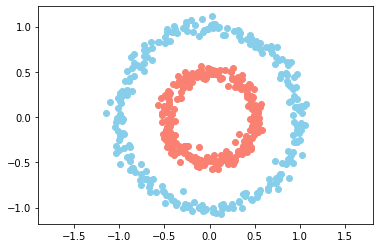

In [6]:
# Create dataset

n = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]
print(Y.shape)

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue", cmap='viridis')
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon", cmap='viridis')
plt.axis('equal')
plt.show()


In [7]:
# Clase de la capa de la red

class neural_layer: 

  def __init__(self, n_conn, n_neur, act_f):

    self.act_f = act_f
    
    self.b = np.random.rand(1, n_neur)      * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1



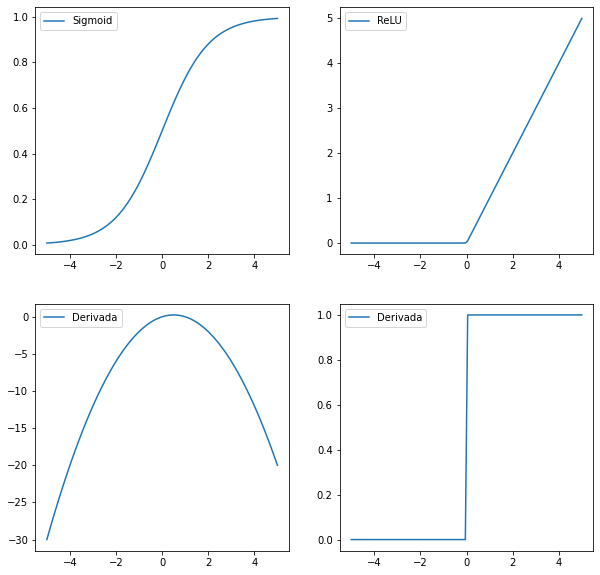

In [8]:
# Function de activación
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

relu = [lambda x: (np.maximum(0, x)),]  
relu.append(lambda x: (x > 0).astype(int))

_x = np.linspace(-5, 5, 100)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0][0].plot(_x, sigm[0](_x), label="Sigmoid")
axs[0][0].legend()
axs[1][0].plot(_x, sigm[1](_x), label="Derivada")
axs[1][0].legend()

axs[0][1].plot(_x, relu[0](_x), label="ReLU")
axs[0][1].legend()
axs[1][1].plot(_x, relu[1](_x), label="Derivada")
axs[1][1].legend()


In [9]:
l0 = neural_layer(p, 2, relu)
l1 = neural_layer(2, 2, relu)
# ...

def create_nn(topology, act_fs):

  nn = []

  for l, layer in enumerate(topology[:-1]):

    nn.append(neural_layer(topology[l], topology[l+1], act_fs[l]))

  return nn


In [10]:

topology = [p, 4, 8, 16, 8, 4, 1]
# act_fs = [sigm, relu, relu, sigm, sigm, relu, sigm]
act_fs = [sigm, sigm, sigm, sigm, sigm, sigm, sigm]

# neural_net = create_nn(topology, act_fs)
neural_net = create_nn(topology, act_fs)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
          lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):

  out = [(None, X)]

  # Forward pass
  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)

    out.append((z, a))

  if train:

    # Backward pass
    deltas = []

    for l in reversed(range(0, len(neural_net))):

      z = out[l+1][0]
      a = out[l+1][1]

      if l == len(neural_net) - 1:
        # Calcular delta última capa
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a)) 
      else:
        # Calcular del respecto a capa previa
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

      _W = neural_net[l].W
    
      # Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

  return out[-1][1]

train(neural_net, X, Y, l2_cost, 0.5)
print("")

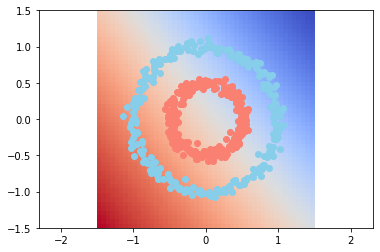

0.24999999995926195


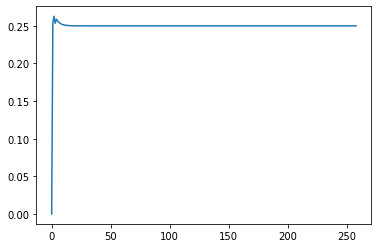

In [ ]:
import time
from IPython.display import clear_output

# neural_n = create_nn(topology, act_fs)
neural_n = create_nn(topology, act_fs)

loss = [0]

for i in range(1500):

  # Entrenamis a la red!
  pY = train(neural_n, X, Y, l2_cost)

  if i % 5 == 0:

    loss.append(l2_cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, lr=0.5, train=False)[0][0]
        print("")
    
    plt.pcolormesh(_x0, _x1, _Y, cmap='coolwarm')
    plt.axis('equal')

    plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue", cmap='viridis')
    plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon", cmap='viridis')
    plt.savefig(f"/content/images/lr_0.5_epocas_1500/mapa/mapa_{i}.png")

    clear_output(wait=True)
    plt.show()

    plt.plot(range(len(loss)), loss)
    plt.savefig(f"/content/images/lr_0.5_epocas_1500/loss/loss_{i}.png")
    print(np.mean(loss))
    wandb.log({"loss": np.mean(loss),
               "epochs": 1500})
    plt.show()
    time.sleep(.4)
